<a href="https://colab.research.google.com/github/Ekaterina37/CS6375.502/blob/master/Assg2_NeuralNet_edits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

In [ ]:
# Reading csv file from github
frames = pd.read_csv("https://raw.githubusercontent.com/batuljp/ML_Assg_Datasets/main/transfusion.data")
frames

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
# Cleaning the dataset
frames.isnull().sum()
frames.drop_duplicates()
frames.dropna()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
# Rename column
frames.rename(columns={'whether he/she donated blood in March 2007': 'DonatedBloodMarch07'}, inplace=True)
print(frames)

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  DonatedBloodMarch07  
0               98                    1  
1               28                    1  
2               35                    1  
3               45         

In [ ]:
frames.isna().sum()
frames.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
DonatedBloodMarch07,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [ ]:
# Getting the Input attributes
# X = frames[["Recency (months)",	"Frequency (times)",	"Monetary (c.c. blood)", "Time (months)"]]
# X = frames.drop('whether he/she donated blood in March 2007', 1)
X = frames.drop('DonatedBloodMarch07', 1)
X.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [ ]:
# Getting the target attribute
Y = frames.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: DonatedBloodMarch07, dtype: int64

In [ ]:
#Normalization
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))

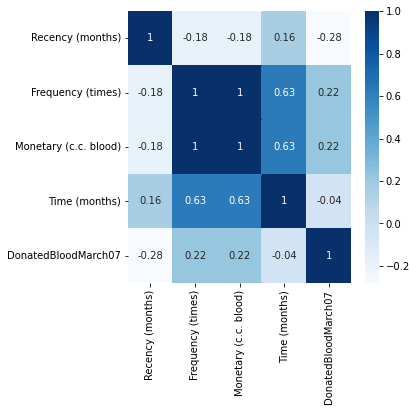

In [ ]:
# Plotting the HeatMap
correlation_matrix = frames.corr().round(2)
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(data=correlation_matrix, annot=True, cmap="Blues", ax=ax)

In [ ]:
# Splitting the dataset into training and testing with ratio 80-20
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(598, 4)
(150, 4)
(598,)
(150,)


In [ ]:
activations = ['logistic', 'tanh', 'relu']
learning_rate = [0.01, 0.1]
# learning_rates = [0.001 , 0.1]
max_iterations = [100, 200] # also known as epochs
num_hidden_layers = [2, 3]

# activations = ['logistic', 'tanh', 'relu']
# learning_rates = [0.001 ,0.01, 0.1]
# max_iterations = [100, 200, 1000] # also known as epochs
# num_hidden_layers = [2, 3, 4]

In [ ]:
train_Accuracy= []
test_Accuracy = []
rmse_Train = []
r2_Train = []
rmse_Test = []
r2_Test = []

In [ ]:
# for a in activations:
#   for b in max_iterations:
#     for c in num_hidden_layers:
#       for d in learning_rate:
#         mlp = MLPClassifier(activation = a, )

In [ ]:
iter = 0 
#MLP classifier to predict output
for j in activations:
 for i in range(0,2):
  for k in learning_rate:
   for l in max_iterations:
    if i == 0:
     mlp = MLPClassifier(hidden_layer_sizes= (5, 5), activation= j, learning_rate_init= k ,solver='adam', max_iter= l)
     
    if i== 1:
     mlp = MLPClassifier(hidden_layer_sizes= (5, 5, 5), activation= j, learning_rate_init= k ,solver='adam', max_iter= l)
      

    mlp.fit(X_Train,Y_Train)
    y_train_predict = mlp.predict(X_Train)
    

    rmse_Train.append(np.sqrt(skm.mean_squared_error(Y_Train, y_train_predict)))
    r2_Train.append(skm.r2_score(Y_Train, y_train_predict))
    

    y_test_predict = mlp.predict(X_Test)

    rmse_Test.append (np.sqrt(skm.mean_squared_error(Y_Test, y_test_predict)))
    r2_Test.append(skm.r2_score(Y_Test, y_test_predict))
    train_Accuracy.append(skm.accuracy_score(Y_Train, y_train_predict))
    test_Accuracy.append(skm.accuracy_score(Y_Test, y_test_predict))
    iter+=1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Activation Function logistic (Training Accuracy)


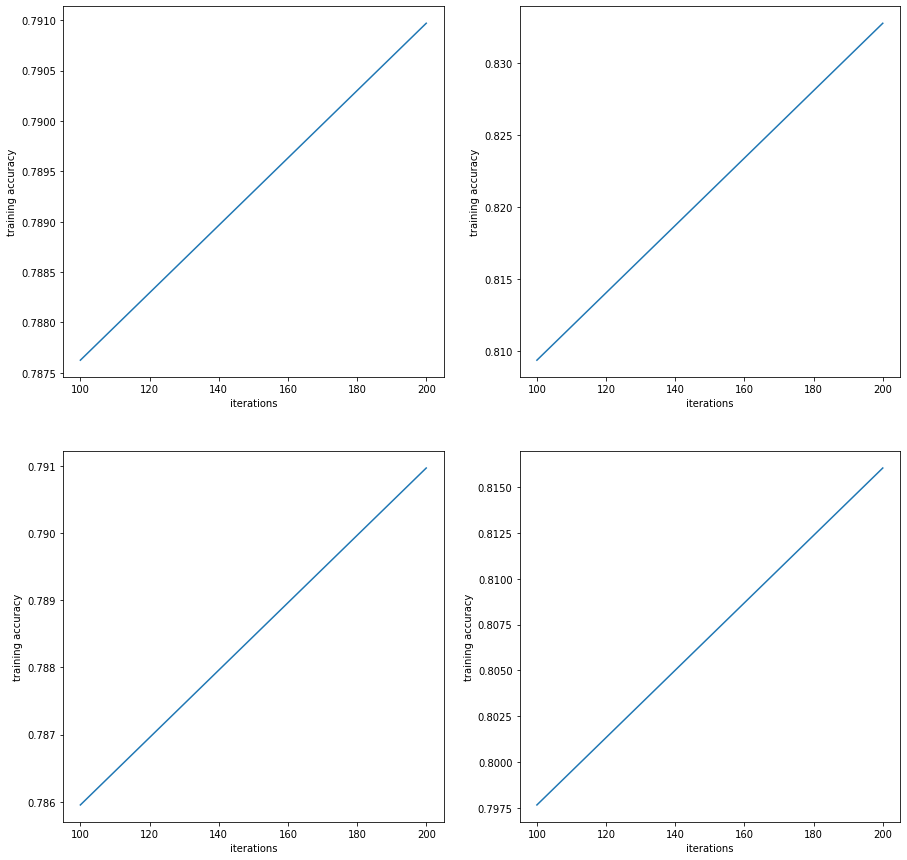

In [ ]:
start = 0
print('Activation Function logistic (Training Accuracy)')
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
for i in range(0,2):
 for j in range(0,2):
  axes[i, j].plot(max_iterations, train_Accuracy[start:start+2])
  start+=2
  axes[i,j].set(xlabel='iterations', ylabel='training accuracy')

Activation Function tanh (Training Accuracy)


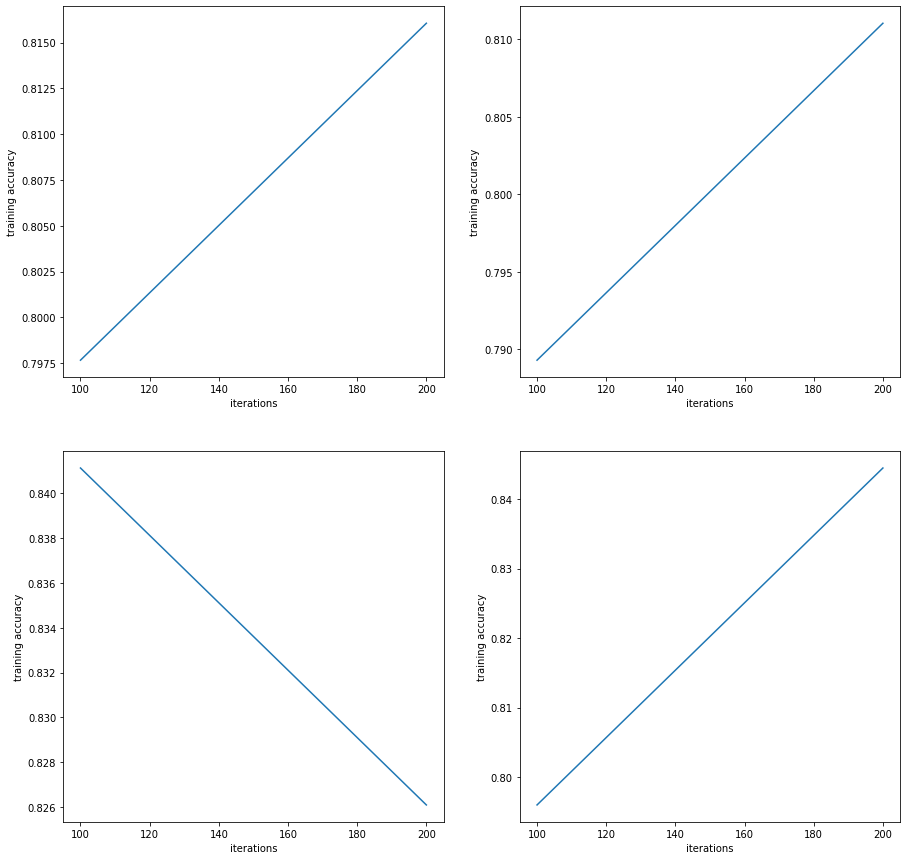

In [ ]:
start-=2
print('Activation Function tanh (Training Accuracy)')
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
for i in range(0,2):
 for j in range(0,2):
  axes[i, j].plot( max_iterations, train_Accuracy[start:start+2])
  start+=2
  axes[i,j].set(xlabel='iterations', ylabel='training accuracy') 

Activation Function ReLu (Training Accuracy)


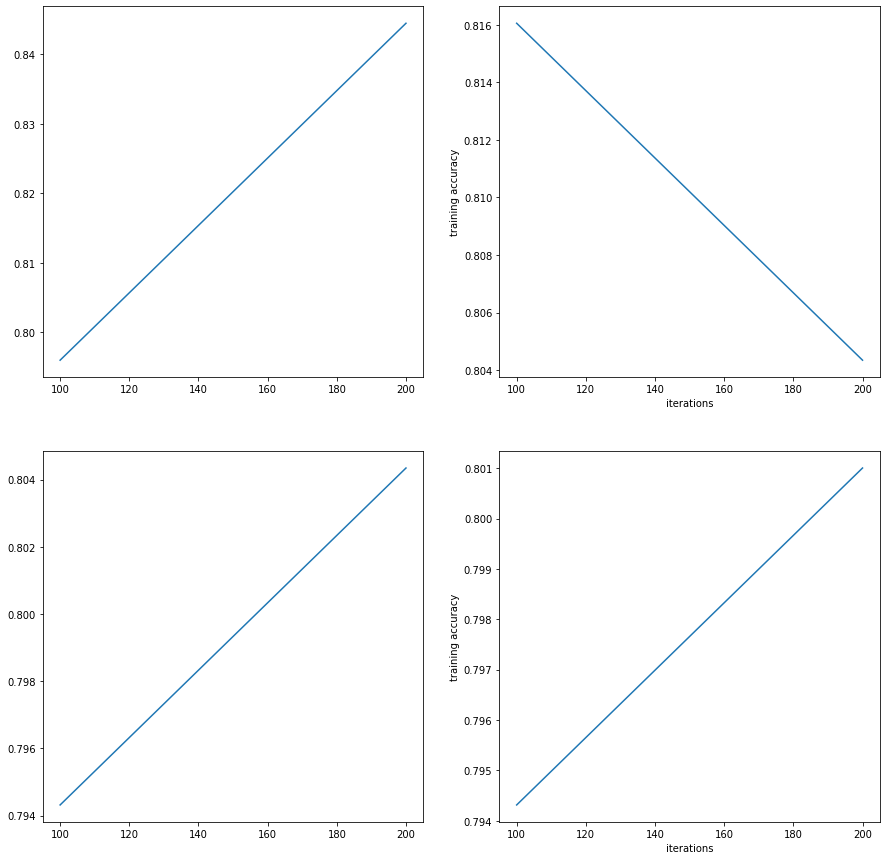

In [ ]:
start-=2
print('Activation Function ReLu (Training Accuracy)')
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
for i in range(0,2):
 for k in range(0,2):
  axes[i, k].plot( max_iterations, train_Accuracy[start:start+2])
  start+=2
  axes[i,j].set(xlabel='iterations', ylabel='training accuracy')

In [ ]:
count = 0
file = open("LogFile.txt", "a+") 
for j in activations:
 file.write('Activation Function: {}\n'.format(j))
 print("Activation Function: ", j)
 for i in num_hidden_layers:
  file.write('Number of Hidden Layers: {}\n\n'.format(i)) 
  print("Number of Hidden Layers: ", i)
  for k in learning_rate:
   file.write('Learning Rate: {}\n'.format(k)) 
   print("Learning Rate: ", k)
   for l in max_iterations:
     file.write('Max Iterations: {}\n'.format(l))
     print("Max Iterations: ", l)
     file.write('train_accuracy {} |test_accuracy {} |rmse_training {} | rmse_test {}\n'.format(train_Accuracy[count], test_Accuracy[count], rmse_Train[count], rmse_Test[count]))
     print('train_accuracy {} |test_accuracy {} |rmse_training {} | rmse_test {} '.format(train_Accuracy[count], test_Accuracy[count], rmse_Train[count], rmse_Test[count]))
     count= count+1
   print()
   file.write('\n')
 print("\n")
file.close() 

Activation Function:  logistic
Number of Hidden Layers:  2
Learning Rate:  0.01
Max Iterations:  100
train_accuracy 0.7876254180602007 |test_accuracy 0.8333333333333334 |rmse_training 0.46084116780057677 | rmse_test 0.408248290463863 
Max Iterations:  200
train_accuracy 0.7909698996655519 |test_accuracy 0.8266666666666667 |rmse_training 0.4571980974746594 | rmse_test 0.41633319989322654 

Learning Rate:  0.1
Max Iterations:  100
train_accuracy 0.8093645484949833 |test_accuracy 0.8133333333333334 |rmse_training 0.43661819877899816 | rmse_test 0.43204937989385733 
Max Iterations:  200
train_accuracy 0.8327759197324415 |test_accuracy 0.7733333333333333 |rmse_training 0.4089304100547653 | rmse_test 0.4760952285695233 

Number of Hidden Layers:  3
Learning Rate:  0.01
Max Iterations:  100
train_accuracy 0.7859531772575251 |test_accuracy 0.8333333333333334 |rmse_training 0.46265194557299216 | rmse_test 0.408248290463863 
Max Iterations:  200
train_accuracy 0.7909698996655519 |test_accuracy 0